# ANÁLISIS DEL PBI PERUANO (USO DE API DEL BCRP)


## I. Introducción

<p style="text-align: justify;"> Practicamente todas las economías del mundo buscan crecer y esto se mide a través del PBI, el Perú no es la excepción. En este sentido, su comportamiento es importante. Desde ya, es fácil presuponer algunas características como la presencia de tendencia en la serie (por lo tanto, no estacionalidad) que nos planteará algunas observaciones. Empezaremos trabajando con el API del BCR para conseguir la base de datos. </p>

## II. API del BCRP

In [1]:
#https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01288PM/html
#PN01770AM : PBI
#PN01142MM : índice bursátil
#PN01288PM:  índice de PM sin alimentos
url_base="https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"
cod_ser="PN01770AM"   #[códigos de series mensuales]
formato="/json"
per="/1980-1/2019-12"
url=url_base+cod_ser+formato+per
print(url)
#args="address=1600+Amphitheatre+Parkway,+Mountain+View,+CA&"+key_api
#No necesitamos poner la url en formato de diccionario, no hay "?" no usamos query con argumentos con key y values

https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01770AM/json/1980-1/2019-12


In [2]:
import requests
response=requests.get(url)
print(response)


<Response [200]>


In [3]:

#print(response.url)
#Extraemos en formato json
response_json=response.json()
print(response_json) 


'''if response.status_code==200:
    content=response.content '''

{'config': {'title': 'Producto bruto interno y demanda interna (índice 2007=100)', 'series': [{'name': 'Producto bruto interno y demanda interna (índice 2007=100) - PBI', 'dec': '1'}]}, 'periods': [{'name': 'Ene.2003', 'values': ['73.2223699646929']}, {'name': 'Feb.2003', 'values': ['71.0794325012595']}, {'name': 'Mar.2003', 'values': ['74.3427233378699']}, {'name': 'Abr.2003', 'values': ['80.6677117569535']}, {'name': 'May.2003', 'values': ['83.2226461043316']}, {'name': 'Jun.2003', 'values': ['80.8537747227157']}, {'name': 'Jul.2003', 'values': ['79.2070173867754']}, {'name': 'Ago.2003', 'values': ['74.2120140864971']}, {'name': 'Sep.2003', 'values': ['73.8678355991462']}, {'name': 'Oct.2003', 'values': ['77.5989137535402']}, {'name': 'Nov.2003', 'values': ['75.5725388652246']}, {'name': 'Dic.2003', 'values': ['78.0097326573703']}, {'name': 'Ene.2004', 'values': ['75.9132671626346']}, {'name': 'Feb.2004', 'values': ['74.0974361472172']}, {'name': 'Mar.2004', 'values': ['78.6354632251

'if response.status_code==200:\n    content=response.content '

In [4]:
for key in response_json.keys():
    print(key)

config
periods


In [5]:
print(response_json['config'])


{'title': 'Producto bruto interno y demanda interna (índice 2007=100)', 'series': [{'name': 'Producto bruto interno y demanda interna (índice 2007=100) - PBI', 'dec': '1'}]}


In [6]:
print(response_json['periods'])

[{'name': 'Ene.2003', 'values': ['73.2223699646929']}, {'name': 'Feb.2003', 'values': ['71.0794325012595']}, {'name': 'Mar.2003', 'values': ['74.3427233378699']}, {'name': 'Abr.2003', 'values': ['80.6677117569535']}, {'name': 'May.2003', 'values': ['83.2226461043316']}, {'name': 'Jun.2003', 'values': ['80.8537747227157']}, {'name': 'Jul.2003', 'values': ['79.2070173867754']}, {'name': 'Ago.2003', 'values': ['74.2120140864971']}, {'name': 'Sep.2003', 'values': ['73.8678355991462']}, {'name': 'Oct.2003', 'values': ['77.5989137535402']}, {'name': 'Nov.2003', 'values': ['75.5725388652246']}, {'name': 'Dic.2003', 'values': ['78.0097326573703']}, {'name': 'Ene.2004', 'values': ['75.9132671626346']}, {'name': 'Feb.2004', 'values': ['74.0974361472172']}, {'name': 'Mar.2004', 'values': ['78.6354632251185']}, {'name': 'Abr.2004', 'values': ['84.0944723950093']}, {'name': 'May.2004', 'values': ['86.5105704991306']}, {'name': 'Jun.2004', 'values': ['83.2874592708797']}, {'name': 'Jul.2004', 'value

In [7]:
print(response_json['periods'][0])

{'name': 'Ene.2003', 'values': ['73.2223699646929']}


In [8]:
print(response_json['periods'][0]["values"])

#MORALEJA: IMPORTANTE DISTINGUIR LISTAS Y DICCIONARIOS EN PYTHON

['73.2223699646929']


In [9]:
print(response_json.get("periods"))

[{'name': 'Ene.2003', 'values': ['73.2223699646929']}, {'name': 'Feb.2003', 'values': ['71.0794325012595']}, {'name': 'Mar.2003', 'values': ['74.3427233378699']}, {'name': 'Abr.2003', 'values': ['80.6677117569535']}, {'name': 'May.2003', 'values': ['83.2226461043316']}, {'name': 'Jun.2003', 'values': ['80.8537747227157']}, {'name': 'Jul.2003', 'values': ['79.2070173867754']}, {'name': 'Ago.2003', 'values': ['74.2120140864971']}, {'name': 'Sep.2003', 'values': ['73.8678355991462']}, {'name': 'Oct.2003', 'values': ['77.5989137535402']}, {'name': 'Nov.2003', 'values': ['75.5725388652246']}, {'name': 'Dic.2003', 'values': ['78.0097326573703']}, {'name': 'Ene.2004', 'values': ['75.9132671626346']}, {'name': 'Feb.2004', 'values': ['74.0974361472172']}, {'name': 'Mar.2004', 'values': ['78.6354632251185']}, {'name': 'Abr.2004', 'values': ['84.0944723950093']}, {'name': 'May.2004', 'values': ['86.5105704991306']}, {'name': 'Jun.2004', 'values': ['83.2874592708797']}, {'name': 'Jul.2004', 'value

In [10]:
#print(response_json.get("periods"))  #el método get me da un resultado parecido a response_json['periods']
periodos=response_json.get("periods")
price_index=[]
for i in periodos:
    valores_list=i['values']
    for w in valores_list:
        w=float(w)
        price_index.append(w)
    
#print(type(price_index[0]))
print(price_index)

    
    
    
    

[73.2223699646929, 71.0794325012595, 74.3427233378699, 80.6677117569535, 83.2226461043316, 80.8537747227157, 79.2070173867754, 74.2120140864971, 73.8678355991462, 77.5989137535402, 75.5725388652246, 78.0097326573703, 75.9132671626346, 74.0974361472172, 78.6354632251185, 84.0944723950093, 86.5105704991306, 83.2874592708797, 82.1067515732165, 77.5146231576807, 77.4025940698837, 79.6324554115629, 82.7195637754647, 85.6503023424352, 79.9791613436588, 80.134460157334, 81.3964132411787, 87.0734472979407, 92.1414553918693, 88.4557732759908, 87.276600902297, 82.9894833725657, 82.0878667862381, 84.8027241979274, 90.4951179010569, 91.5459269781851, 85.6590427598994, 84.6285223502132, 91.2286931254313, 91.7780026508836, 97.7619066472792, 95.0729001070201, 92.9616004138741, 91.5547630160115, 88.7693298777215, 92.1822069581638, 94.7874215284444, 99.4183590716473, 89.948891875024, 88.6754172656189, 96.7166807859656, 96.6358439215487, 104.744753291331, 101.255860662521, 102.534731811414, 100.11395046

In [11]:
fechas=[]
for i in periodos:
    nombres=i['name']
    fechas.append(nombres)
    
print(fechas)

['Ene.2003', 'Feb.2003', 'Mar.2003', 'Abr.2003', 'May.2003', 'Jun.2003', 'Jul.2003', 'Ago.2003', 'Sep.2003', 'Oct.2003', 'Nov.2003', 'Dic.2003', 'Ene.2004', 'Feb.2004', 'Mar.2004', 'Abr.2004', 'May.2004', 'Jun.2004', 'Jul.2004', 'Ago.2004', 'Sep.2004', 'Oct.2004', 'Nov.2004', 'Dic.2004', 'Ene.2005', 'Feb.2005', 'Mar.2005', 'Abr.2005', 'May.2005', 'Jun.2005', 'Jul.2005', 'Ago.2005', 'Sep.2005', 'Oct.2005', 'Nov.2005', 'Dic.2005', 'Ene.2006', 'Feb.2006', 'Mar.2006', 'Abr.2006', 'May.2006', 'Jun.2006', 'Jul.2006', 'Ago.2006', 'Sep.2006', 'Oct.2006', 'Nov.2006', 'Dic.2006', 'Ene.2007', 'Feb.2007', 'Mar.2007', 'Abr.2007', 'May.2007', 'Jun.2007', 'Jul.2007', 'Ago.2007', 'Sep.2007', 'Oct.2007', 'Nov.2007', 'Dic.2007', 'Ene.2008', 'Feb.2008', 'Mar.2008', 'Abr.2008', 'May.2008', 'Jun.2008', 'Jul.2008', 'Ago.2008', 'Sep.2008', 'Oct.2008', 'Nov.2008', 'Dic.2008', 'Ene.2009', 'Feb.2009', 'Mar.2009', 'Abr.2009', 'May.2009', 'Jun.2009', 'Jul.2009', 'Ago.2009', 'Sep.2009', 'Oct.2009', 'Nov.2009', 'Di

## III. Limpieza y creación de Data Frame

In [12]:

import pandas as pd

In [13]:
diccionario= {"Fechas":fechas, "Valores":price_index}
print(diccionario)

{'Fechas': ['Ene.2003', 'Feb.2003', 'Mar.2003', 'Abr.2003', 'May.2003', 'Jun.2003', 'Jul.2003', 'Ago.2003', 'Sep.2003', 'Oct.2003', 'Nov.2003', 'Dic.2003', 'Ene.2004', 'Feb.2004', 'Mar.2004', 'Abr.2004', 'May.2004', 'Jun.2004', 'Jul.2004', 'Ago.2004', 'Sep.2004', 'Oct.2004', 'Nov.2004', 'Dic.2004', 'Ene.2005', 'Feb.2005', 'Mar.2005', 'Abr.2005', 'May.2005', 'Jun.2005', 'Jul.2005', 'Ago.2005', 'Sep.2005', 'Oct.2005', 'Nov.2005', 'Dic.2005', 'Ene.2006', 'Feb.2006', 'Mar.2006', 'Abr.2006', 'May.2006', 'Jun.2006', 'Jul.2006', 'Ago.2006', 'Sep.2006', 'Oct.2006', 'Nov.2006', 'Dic.2006', 'Ene.2007', 'Feb.2007', 'Mar.2007', 'Abr.2007', 'May.2007', 'Jun.2007', 'Jul.2007', 'Ago.2007', 'Sep.2007', 'Oct.2007', 'Nov.2007', 'Dic.2007', 'Ene.2008', 'Feb.2008', 'Mar.2008', 'Abr.2008', 'May.2008', 'Jun.2008', 'Jul.2008', 'Ago.2008', 'Sep.2008', 'Oct.2008', 'Nov.2008', 'Dic.2008', 'Ene.2009', 'Feb.2009', 'Mar.2009', 'Abr.2009', 'May.2009', 'Jun.2009', 'Jul.2009', 'Ago.2009', 'Sep.2009', 'Oct.2009', 'Nov

In [14]:
df = pd.DataFrame(diccionario)
#df.set_index(df['date'], inplace=True)
#df=df.drop(columns=['date'])
#df["Fechas"]=pd.to_datetime(df["Fechas"], infer_datetime_format=True)
#Hay nulls?
#df.isnull().sum()  #no hay
df

,Fechas,Valores
0,Ene.2003,73.222370
1,Feb.2003,71.079433
2,Mar.2003,74.342723
3,Abr.2003,80.667712
4,May.2003,83.222646
...,...,...
199,Ago.2019,172.844689
200,Sep.2019,172.464651
201,Oct.2019,176.009008
202,Nov.2019,174.036428


Text(0.5, 1.0, 'Distribución deL PBI')

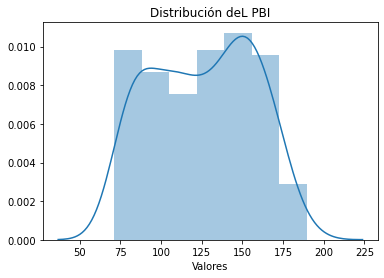

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['Valores'])
plt.title('Distribución deL PBI')

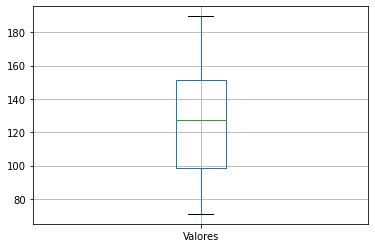

In [16]:
df.boxplot('Valores')


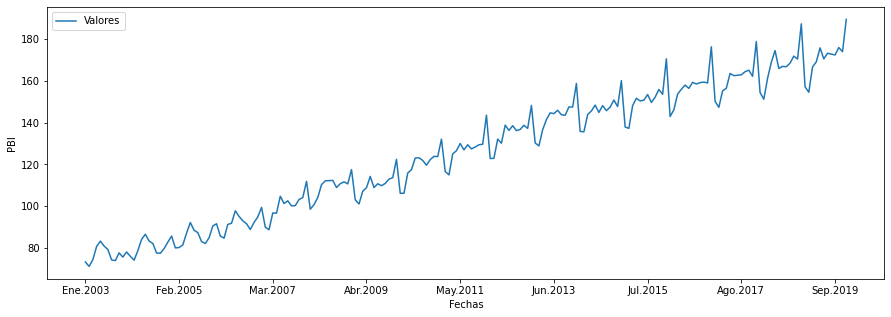

In [17]:

df.plot(x ='Fechas', y='Valores', figsize=(15, 5), kind = 'line')
plt.xlabel("Fechas")
plt.ylabel("PBI")
plt.show()

In [18]:
print(df.dtypes)
df

Fechas      object
Valores    float64
dtype: object


,Fechas,Valores
0,Ene.2003,73.222370
1,Feb.2003,71.079433
2,Mar.2003,74.342723
3,Abr.2003,80.667712
4,May.2003,83.222646
...,...,...
199,Ago.2019,172.844689
200,Sep.2019,172.464651
201,Oct.2019,176.009008
202,Nov.2019,174.036428


In [19]:
df["Fechas"] = ['{}-{}'.format(x[0],x[1]) for x in map(lambda x: str(x).split('.'), df["Fechas"])]

for i in df["Fechas"]:
    if i[:3]=="Ene":
        a=i.replace("Ene", "01")
        df.Fechas.replace({i: a}, inplace=True)
    if i[:3]=="Feb":
        a=i.replace("Feb", "02")
        df.Fechas.replace({i: a}, inplace=True)
    if i[:3]=="Mar":
        a=i.replace("Mar", "03")
        df.Fechas.replace({i: a}, inplace=True)
    if i[:3]=="Abr":
        a=i.replace("Abr", "04")
        df.Fechas.replace({i: a}, inplace=True)
    if i[:3]=="May":
        a=i.replace("May", "05")
        df.Fechas.replace({i: a}, inplace=True)
    if i[:3]=="Jun":
        a=i.replace("Jun", "06")
        df.Fechas.replace({i: a}, inplace=True)
    if i[:3]=="Jul":
        a=i.replace("Jul", "07")
        df.Fechas.replace({i: a}, inplace=True)
    if i[:3]=="Ago":
        a=i.replace("Ago", "08")
        df.Fechas.replace({i: a}, inplace=True)
    if i[:3]=="Sep":
        a=i.replace("Sep", "09")
        df.Fechas.replace({i: a}, inplace=True)
    if i[:3]=="Oct":
        a=i.replace("Oct", "10")
        df.Fechas.replace({i: a}, inplace=True)
    if i[:3]=="Nov":
        a=i.replace("Nov", "11")
        df.Fechas.replace({i: a}, inplace=True)
    if i[:3]=="Dic":
        a=i.replace("Dic", "12")
        df.Fechas.replace({i: a}, inplace=True)
    
        
df.head(12)    
        
        #| i=="Feb"| i=="Mar" | i=="Abr" |i=="May" |'''


    


,Fechas,Valores
0,01-2003,73.222370
1,02-2003,71.079433
2,03-2003,74.342723
3,04-2003,80.667712
4,05-2003,83.222646
5,06-2003,80.853775
6,07-2003,79.207017
7,08-2003,74.212014
8,09-2003,73.867836
9,10-2003,77.598914


In [20]:
from datetime import datetime
con=df['Fechas']
df['Fechas']=pd.to_datetime(df['Fechas'], format = '%m-%Y')
df.set_index('Fechas', inplace=True)
df.index
#datos=df["Valores"]
#df=[datetime(2010,1,1)]

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='Fechas', length=204, freq=None)

In [21]:
df

,Valores
Fechas,
2003-01-01,73.222370
2003-02-01,71.079433
2003-03-01,74.342723
2003-04-01,80.667712
2003-05-01,83.222646
...,...
2019-08-01,172.844689
2019-09-01,172.464651
2019-10-01,176.009008


In [22]:
print(df["Valores"][0:12].mean(),  df["Valores"][1:13].mean())
#Python remplazará la posición 12 por el promedio de los 12 primeros elementos 
#Los 11 primeros elementos serán NA, empieza desde el 12.


76.82139256136473 77.04563399452655


In [23]:
#Suavizando en función a las de
#Calculamos las medias (suaviza la línea)
rolmedia=df.rolling(window=12).mean()
#print(rolmedia,rolsd)
rolmedia.head(24)


,Valores
Fechas,
2003-01-01,NaN
2003-02-01,NaN
2003-03-01,NaN
2003-04-01,NaN
2003-05-01,NaN
2003-06-01,NaN
2003-07-01,NaN
2003-08-01,NaN
2003-09-01,NaN


In [24]:
##Lo mismo para las desviaciones
print(df["Valores"][0:12].std(),  df["Valores"][1:13].std())

3.6791436970353906 3.5183337898150073


In [25]:
rolsd=df.rolling(window=12).std()
rolsd.head(14)


,Valores
Fechas,
2003-01-01,NaN
2003-02-01,NaN
2003-03-01,NaN
2003-04-01,NaN
2003-05-01,NaN
2003-06-01,NaN
2003-07-01,NaN
2003-08-01,NaN
2003-09-01,NaN


## IV ANÁLISIS DE SERIE DE TIEMPO

### 4.1 ESTACIONALIDAD

#### 4.1.1 Análisis visual

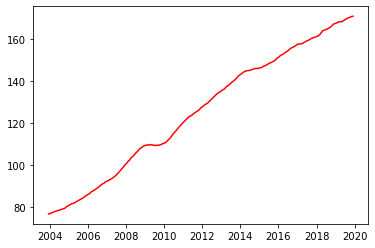

In [26]:
mean = plt.plot(rolmedia, color='red', label='Rolling Mean')
plt.show()

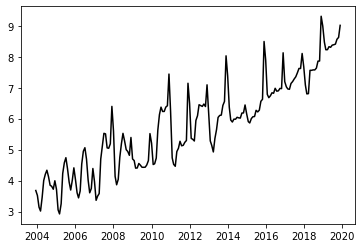

In [27]:

std = plt.plot(rolsd, color='black', label = 'Rolling Std')
plt.show()

#### 4.1.2 Prueba estadística (ADF)

In [28]:
#Test DICKEY FULLER Y EL KPPS TEST
from statsmodels.tsa.stattools import adfuller
def test_estacionalidad(timeseries):
    #Rolling statistics
    rolmedia = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    #Plot 
    orig = plt.plot(timeseries, color='blue',label='Original')
    media = plt.plot(rolmedia, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Original, Rolling Mean & Standard Deviation')
    plt.show()
    
    #Dickey-Fuller test:
    print('Resultado del DF test:')
    dftest = adfuller(timeseries, autolag="AIC")  #Akaike
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    '''https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html'''
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

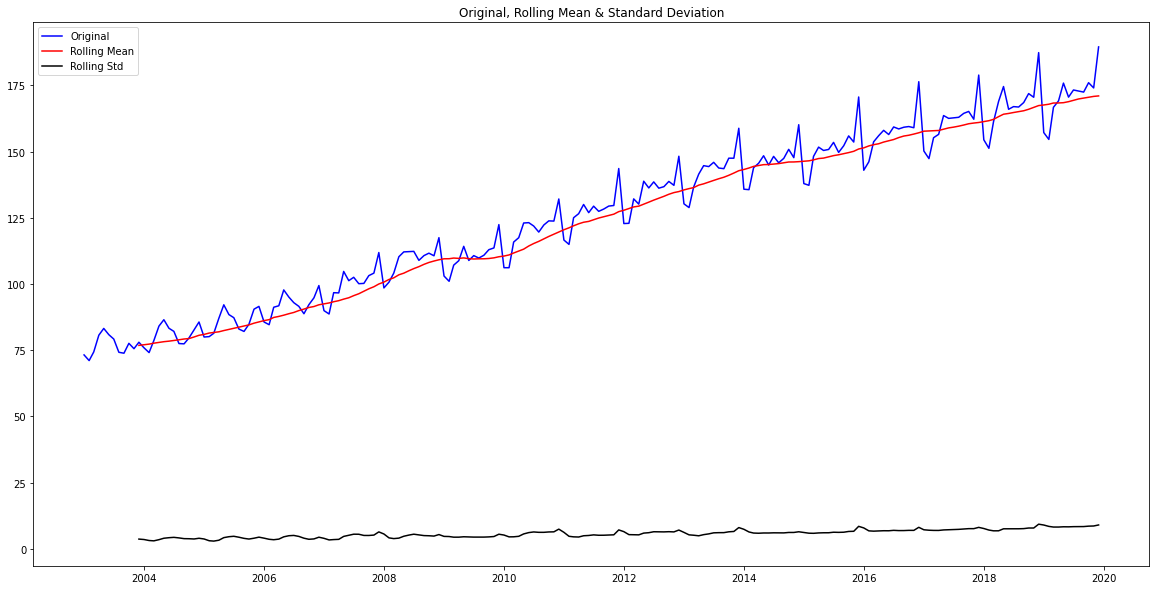

Resultado del DF test:
Test Statistic                  -1.058245
p-value                          0.731433
#Lags Used                      13.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


In [29]:
plt.figure(figsize=(20,10))
test_estacionalidad(df["Valores"])


## PROBLEMA: No estacionalidad en media y varianza.
## TRATAMIENTO: Logaritmo (var) y diferencias (media).

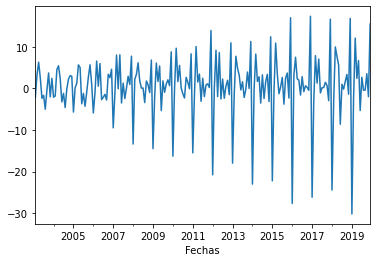

In [30]:
df['Valores_diff'] = df['Valores'] - df['Valores'].shift(1)
df['Valores_diff'].dropna().plot()

In [31]:
df

,Valores,Valores_diff
Fechas,,
2003-01-01,73.222370,NaN
2003-02-01,71.079433,-2.142937
2003-03-01,74.342723,3.263291
2003-04-01,80.667712,6.324988
2003-05-01,83.222646,2.554934
...,...,...
2019-08-01,172.844689,-0.414164
2019-09-01,172.464651,-0.380038
2019-10-01,176.009008,3.544358


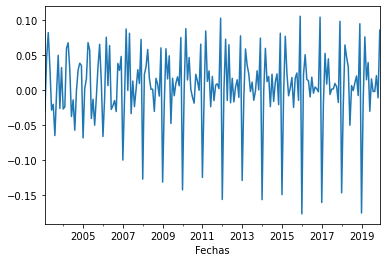

In [32]:
#Incluimos tratamiento de varianza
import numpy as np
df['Valores_log'] = np.log(df['Valores'])   #Llevamos a logaritmos
df['Valores_diff'] = df['Valores_log'] - df['Valores_log'].shift(1) #Movemos un elemento abajo con shift para hallar la primera diferencia 
df['Valores_diff'].dropna().plot()

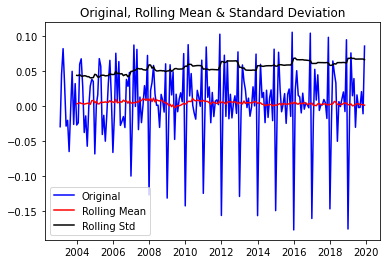

Resultado del DF test:
Test Statistic                  -3.150739
p-value                          0.023019
#Lags Used                      12.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


In [33]:
test_estacionalidad(df["Valores_diff"].dropna())

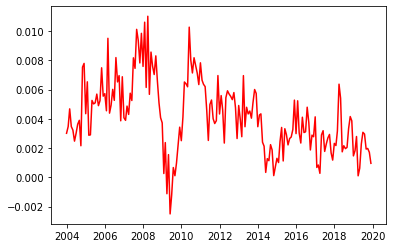

In [34]:
roldif=df["Valores_diff"].dropna().rolling(window=12).mean()
std = plt.plot(roldif, color='red', label = 'Rolling Std')
plt.show()

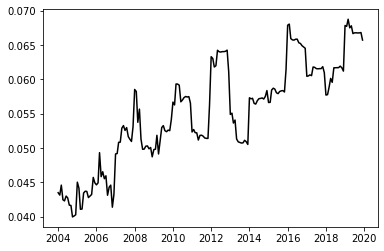

In [35]:
roldif=df["Valores_diff"].dropna().rolling(window=12).std()  #Prueba con "Valores_log"
std = plt.plot(roldif, color='black', label = 'Rolling Std')
plt.show()

<Figure size 432x288 with 0 Axes>

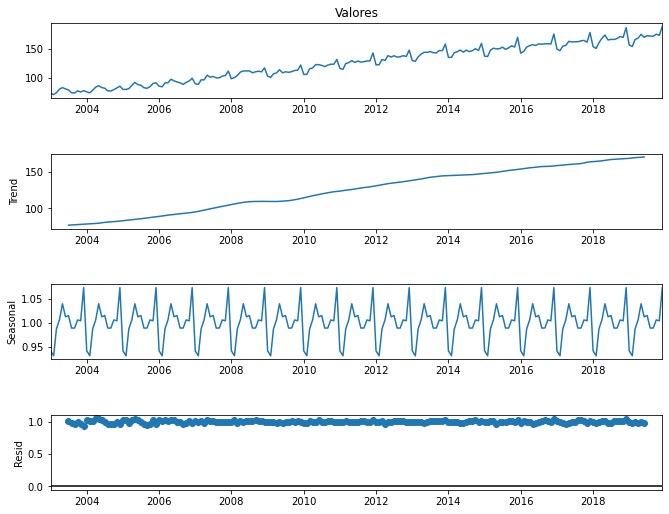

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
###¿MODELO ADITIVO O MULTIPLICATIVO?
seasonal = seasonal_decompose(df.Valores,model='multiplicative')
fig = plt.figure()  
fig = seasonal.plot()  
fig.set_size_inches(10, 8)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Bibliografía
https://machinelearningmastery.com/time-series-seasonality-with-python/#:~:text=Time%20series%20data%20may%20contain,patterns%20within%20any%20fixed%20period. 